In [1]:
from outbreak_data.authenticate_user import set_authentication
from outbreak_data import outbreak_data
import auth_token

set_authentication(auth_token.get_auth_token())

In [2]:
samples = outbreak_data.get_wastewater_samples(region="Ohio", date_range=["2023-09-01", "2024-01-01"])
samples = outbreak_data.get_wastewater_lineages(samples)
samples = outbreak_data.normalize_ww_loads_by_site(samples)

https://dev.outbreak.info/wastewater_metadata/query?fetch_all=true&q=geo_loc_region:Ohio AND collection_date:[2023-09-01 TO 2024-01-01] AND demix_success:true
https://dev.outbreak.info/wastewater_metadata/query?scroll_id=FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFnNKbEd4cUZSVEEtOXdfRy1JVV8tMmcAAAAAAAwyqhZHV0dfbkk2elNUS2dCdTI1dzA4T3F3&fetch_all=True&page=0
https://dev.outbreak.info/wastewater_metadata/query?scroll_id=FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFnNKbEd4cUZSVEEtOXdfRy1JVV8tMmcAAAAAAAwyqhZHV0dfbkk2elNUS2dCdTI1dzA4T3F3&fetch_all=True&page=1


In [3]:
g = outbreak_data.datebin_and_agg_ww(samples, freq='7D')

/home/emory/code/python-outbreak-info/outrbeakpy_venv/lib/python3.11/site-packages/outbreak_data/outbreak_data.py:841: RuntimeWarning: invalid value encountered in scalar divide
  agg_abundance = lambda lin: lambda x: (x['abundance'] * (x['name'] == lin) * x['weight']).sum() / (x['abundance'] * x['weight']).sum()


In [4]:
g

,viral_load,EG.2,EG.5.1.1,FE.1.1.2,FL.17.2,FP.3,FU.4,GJ.1.2.6,HK.19,HN.5,...,CK.1.1.1,BN.2.1,HZ.2,XBB.1.40,BA.2.61,BA.2.79.1,BA.2.38,BE.1.4.3,BA.2.9.5,XBB.2.12
date_bin,,,,,,,,,,,,,,,,,,,,,
"(2023-09-05 00:00:00, 2023-09-12 00:00:00]",2.441626,0.044147,0.031618,0.000000,3.266095e-05,0.001463,2.742871e-05,0.000002,0.002139,0.000754,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-09-12 00:00:00, 2023-09-19 00:00:00]",1.670377,0.045831,0.044987,0.000022,3.059129e-05,0.000214,3.077379e-05,0.014950,0.057701,0.045035,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-09-19 00:00:00, 2023-09-26 00:00:00]",1.615133,0.025476,0.008128,0.000000,0.000000e+00,0.000659,3.420148e-05,0.000000,0.000000,0.000006,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-09-26 00:00:00, 2023-10-03 00:00:00]",1.465379,0.035280,0.000430,0.000000,1.864813e-06,0.002398,1.975000e-05,0.000000,0.000005,0.000003,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-10-03 00:00:00, 2023-10-10 00:00:00]",1.134159,0.039043,0.000000,0.000000,9.990044e-06,0.020308,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-10-10 00:00:00, 2023-10-17 00:00:00]",0.814803,0.127858,0.000550,0.000000,0.000000e+00,0.003084,2.131128e-05,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-10-17 00:00:00, 2023-10-24 00:00:00]",1.218636,0.082311,0.013734,0.000004,2.172247e-06,0.070255,0.000000e+00,0.000000,0.000000,0.000000,...,8.828018e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-10-24 00:00:00, 2023-10-31 00:00:00]",1.231107,0.018114,0.002363,0.000000,2.655984e-06,0.000569,3.898506e-05,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0
"(2023-10-31 00:00:00, 2023-11-07 00:00:00]",1.406808,0.062071,0.002606,0.000000,0.000000e+00,0.093917,6.594078e-05,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0


In [5]:
top = g[g.drop(columns=['viral_load']).sum(axis=0).sort_values()[-10:].index]

<Axes: title={'center': 'Ohio wastewater'}, xlabel='date_bin'>

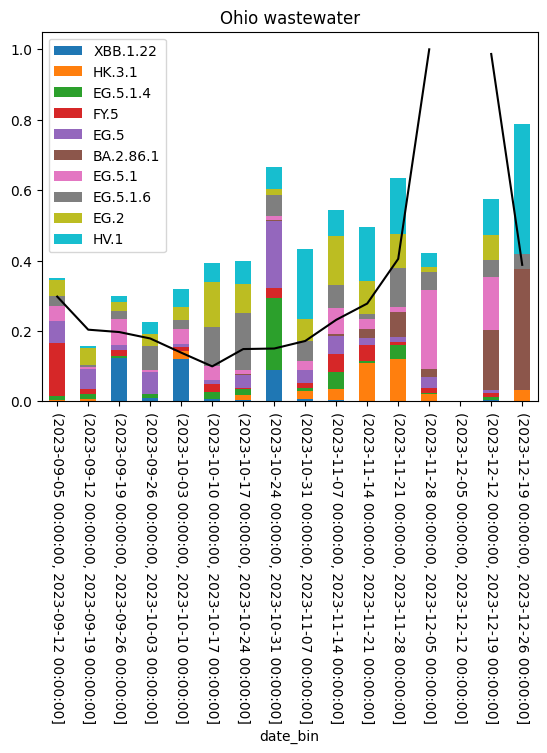

In [8]:
top.plot(kind='bar', stacked=True, rot=-90)
(g['viral_load'] / g['viral_load'].max()).plot(color='black', rot=-90, title='Ohio wastewater')